# CAM - class activation map

# Define models

In [2]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_and_save(model_train, model_name):
    fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(20,7))
    loss_ax.set_title('Loss')
    loss_ax.plot(model_train.history['loss'], '-r', label='Train')
    loss_ax.plot(model_train.history['val_loss'], '-g', label='Validation')
    acc_ax.set_title('Accuracy')
    acc_ax.plot(model_train.history['accuracy'], '-r', label='Train')
    acc_ax.plot(model_train.history['val_accuracy'], '-g', label='Validation')
    plt.legend(loc = 4)
    figname = "{}.png".format(model_name)
    plt.savefig(figname)


def test_train(model, model_name: str, model_description: str):
    model_weights = "{}.h5".format(model_name)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 10, verbose = 1)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(model_weights, 
                                                  monitor         = 'val_accuracy', 
                                                  verbose         = 1, 
                                                  save_best_only  = True)
    start = time.time()
    model_train = model.fit(mnist_train_x, 
                          mnist_train_y, 
                          validation_split  = 0.2, 
                          callbacks         = [earlystop, checkpoint], 
                          epochs            = 10000, 
                          batch_size        = 256)
    elapsed = time.time() - start
    model.load_weights(model_weights)
    plot_and_save(model_train, model_name)
    print(model_name)
    _, train_acc = model.evaluate(mnist_train_x, mnist_train_y)
    print('Train accuracy: {}'.format(train_acc))
    _, test_acc = model.evaluate(mnist_test_x, mnist_test_y)
    print('Test accuracy: {}'.format(test_acc))
    with open("results.csv", "a") as f:
        f.write("{};{};{};{};{}\n".format(model_name, model_description, elapsed, train_acc, test_acc))
    confusion_train, confusion_test = "{}-confusion_train.csv".format(model_name), "{}-confusion_test.csv".format(model_name)
    np.savetxt(confusion_train, confusion_matrix(mnist_train_y, np.argmax(model.predict(mnist_train_x),axis=1)), delimiter=",")
    np.savetxt(confusion_test, confusion_matrix(mnist_test_y, np.argmax(model.predict(mnist_test_x),axis=1)), delimiter=",")
    print("----------------------------------------------------------------------")

def model_summary(model):
    string_list = []
    model.summary(print_fn=lambda x: string_list.append(x))
    short_model_summary = "\n".join(string_list)
    return short_model_summary

In [3]:
import tensorflow_datasets as tfds

mnist_data, mnist_info = tfds.load('mnist', with_info=True)


Dataset mnist downloaded and prepared to /Users/gravo/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
import numpy as np

mnist_train_x = np.asarray([instance['image']/255 for instance in tfds.as_numpy(mnist_data['train'])])
mnist_train_y = np.asarray([instance['label'] for instance in tfds.as_numpy(mnist_data['train'])])

mnist_test_x = np.asarray([instance['image']/255 for instance in tfds.as_numpy(mnist_data['test'])])
mnist_test_y = np.asarray([instance['label'] for instance in tfds.as_numpy(mnist_data['test'])])

In [5]:
image_shape = mnist_train_x[0].shape
image_shape

(28, 28, 1)

In [9]:
import tensorflow as tf

model_name_c3 = "model_c3"
model_description_c3 =\
'''
SAPO
'''
model_c3 = tf.keras.Sequential(name = model_name_c3)
model_c3.add(tf.keras.layers.Input(image_shape))
model_c3.add(tf.keras.layers.Conv2D(filters = 16, 
                                    kernel_size = (3,3),
                                    activation="relu", 
                                    padding="same", 
                                    name="convolution_1"))
model_c3.add(tf.keras.layers.Conv2D(filters = 16, 
                                    kernel_size = (3,3),
                                    activation="relu", 
                                    padding="same", 
                                    name="convolution_2"))
model_c3.add(tf.keras.layers.Conv2D(filters = 16, 
                                    kernel_size = (3,3),
                                    activation="relu", 
                                    padding="same", 
                                    name="convolution_3"))
model_c3.add(tf.keras.layers.Conv2D(filters = 16, 
                                    kernel_size = (3,3),
                                    activation="relu", 
                                    padding="same", 
                                    name="convolution_4"))
model_c3.add(tf.keras.layers.Conv2D(filters = 256, 
                                    kernel_size = (3,3),
                                    activation="relu", 
                                    padding="same", 
                                    name="convolution_5"))
model_c3.add(tf.keras.layers.GlobalAveragePooling2D(name = "GAP"))
model_c3.add(tf.keras.layers.Dense(10, 
                                   activation='softmax', 
                                   name='output',
                                   use_bias = False))
model_c3.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='Adam', 
                 metrics=['accuracy'])
model_c3.summary()
model_description_c3 = model_summary(model_c3) + model_description_c3
model_description_c3 = model_description_c3.replace("\n","\\n")

Model: "model_c3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 16)        160       
_________________________________________________________________
convolution_2 (Conv2D)       (None, 28, 28, 16)        2320      
_________________________________________________________________
convolution_3 (Conv2D)       (None, 28, 28, 16)        2320      
_________________________________________________________________
convolution_4 (Conv2D)       (None, 28, 28, 16)        2320      
_________________________________________________________________
convolution_5 (Conv2D)       (None, 28, 28, 256)       37120     
_________________________________________________________________
GAP (GlobalAveragePooling2D) (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                256

## Define functions

## Test and train

Epoch 1/10000
188/188 [==============================] - 139s 740ms/step - loss: 1.6669 - accuracy: 0.3907 - val_loss: 1.1561 - val_accuracy: 0.6314

Epoch 00001: val_accuracy improved from -inf to 0.63142, saving model to model_c3.h5
Epoch 2/10000
188/188 [==============================] - 135s 716ms/step - loss: 0.9093 - accuracy: 0.7111 - val_loss: 0.7458 - val_accuracy: 0.7788

Epoch 00002: val_accuracy improved from 0.63142 to 0.77875, saving model to model_c3.h5
Epoch 3/10000
188/188 [==============================] - 127s 677ms/step - loss: 0.6255 - accuracy: 0.8077 - val_loss: 0.5391 - val_accuracy: 0.8455

Epoch 00003: val_accuracy improved from 0.77875 to 0.84550, saving model to model_c3.h5
Epoch 4/10000
188/188 [==============================] - 128s 683ms/step - loss: 0.4817 - accuracy: 0.8564 - val_loss: 0.3963 - val_accuracy: 0.8886

Epoch 00004: val_accuracy improved from 0.84550 to 0.88858, saving model to model_c3.h5
Epoch 5/10000
188/188 [============================

188/188 [==============================] - 126s 673ms/step - loss: 0.0933 - accuracy: 0.9714 - val_loss: 0.0882 - val_accuracy: 0.9728

Epoch 00038: val_accuracy improved from 0.97233 to 0.97283, saving model to model_c3.h5
Epoch 39/10000
188/188 [==============================] - 126s 672ms/step - loss: 0.0891 - accuracy: 0.9729 - val_loss: 0.0936 - val_accuracy: 0.9730

Epoch 00039: val_accuracy improved from 0.97283 to 0.97300, saving model to model_c3.h5
Epoch 40/10000
188/188 [==============================] - 127s 676ms/step - loss: 0.0821 - accuracy: 0.9744 - val_loss: 0.0906 - val_accuracy: 0.9752

Epoch 00040: val_accuracy improved from 0.97300 to 0.97517, saving model to model_c3.h5
Epoch 41/10000
188/188 [==============================] - 127s 675ms/step - loss: 0.0852 - accuracy: 0.9741 - val_loss: 0.0848 - val_accuracy: 0.9745

Epoch 00041: val_accuracy did not improve from 0.97517
Epoch 42/10000
188/188 [==============================] - 127s 677ms/step - loss: 0.0819 - a

188/188 [==============================] - 125s 667ms/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0466 - val_accuracy: 0.9854

Epoch 00076: val_accuracy did not improve from 0.98592
Epoch 77/10000
188/188 [==============================] - 126s 668ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0458 - val_accuracy: 0.9877

Epoch 00077: val_accuracy improved from 0.98592 to 0.98767, saving model to model_c3.h5
Epoch 78/10000
188/188 [==============================] - 125s 668ms/step - loss: 0.0430 - accuracy: 0.9871 - val_loss: 0.0475 - val_accuracy: 0.9857

Epoch 00078: val_accuracy did not improve from 0.98767
Epoch 79/10000
188/188 [==============================] - 125s 667ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0466 - val_accuracy: 0.9866

Epoch 00079: val_accuracy did not improve from 0.98767
Epoch 80/10000
188/188 [==============================] - 126s 669ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0531 - val_accuracy: 0.9839

Epoch 0

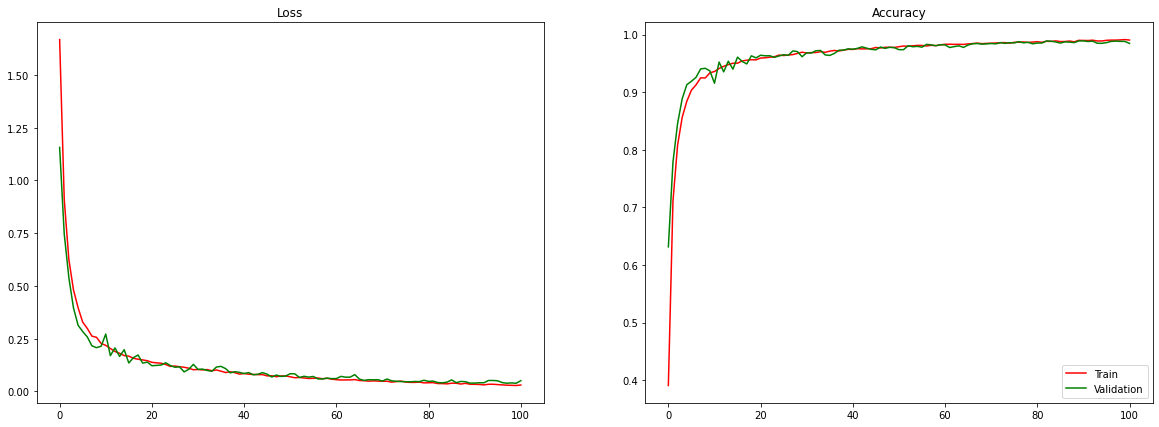

In [10]:
with open("results.csv", "w+") as f:
    f.write("model name;model description;training time;train accuracy;test accuracy\n")
test_train(model_c3, model_name_c3, model_description_c3)